In [10]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

import requests
from io import BytesIO
from PIL import Image

In [21]:
model = ResNet50(weights='imagenet') #juz wytrenowany model 

In [3]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

![](https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg)

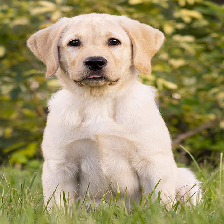

In [22]:
url_img = "https://www.guidedogs.org/wp-content/uploads/2019/11/website-donate-mobile.jpg" #randomowe zdjęcie psa

response = requests.get(url_img)
img = Image.open(BytesIO(response.content))
img = img.resize((224,224)) #tyle pikseli wymaga model
img

In [23]:
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0) #model wymaga opisania ile elementów (1) 
X.shape

(1, 224, 224, 3)

In [18]:
y_pred = model.predict(X)

In [24]:
decode_predictions(y_pred, top=3) #do odczytania 

[[('n02099712', 'Labrador_retriever', 0.611541),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.09050974),
  ('n02092339', 'Weimaraner', 0.064062074)]]